In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
gs = pd.read_csv('logs/gs/GS-Trial1-29458.80142736435s.csv')
gs['Strategy'] = 'Grid Search'
rs = pd.read_csv('logs/rs/RS-Trial1-29458s.csv')
rs['Strategy'] = 'Random Search'
bs = pd.read_csv('logs/bs/BAYES-Trial1-29458s.csv')
bs['Strategy'] = 'Bayes Search'
des = np.load('logs/des/DES-Trial1-29458s.npy', allow_pickle=True)

In [3]:
df = pd.concat([gs, rs, bs])

array([[<Axes: title={'center': 'ptl/train_accuracy'}, xlabel='[Strategy]'>,
        <Axes: title={'center': 'ptl/train_loss'}, xlabel='[Strategy]'>],
       [<Axes: title={'center': 'ptl/val_accuracy'}, xlabel='[Strategy]'>,
        <Axes: title={'center': 'ptl/val_loss'}, xlabel='[Strategy]'>]],
      dtype=object)

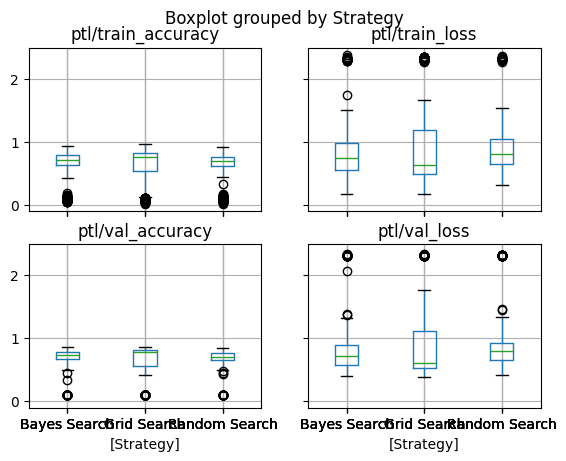

In [4]:
df[['ptl/train_loss', 'ptl/train_accuracy', 'ptl/val_loss', 'ptl/val_accuracy', 'Strategy']].boxplot(by='Strategy')

In [5]:
df_short = df[['ptl/train_loss', 'ptl/train_accuracy', 'ptl/val_loss', 'ptl/val_accuracy', 'Strategy', 'time_total_s']]

In [6]:
df_short.sort_values(by='ptl/val_loss').head(20)

,ptl/train_loss,ptl/train_accuracy,ptl/val_loss,ptl/val_accuracy,Strategy,time_total_s
159,0.320910,0.859375,0.390188,0.854153,Grid Search,116.782167
63,0.359913,0.890625,0.393118,0.855707,Grid Search,111.751199
132,0.384533,0.843750,0.399503,0.850568,Grid Search,127.094621
20,0.226535,0.921875,0.399800,0.851625,Bayes Search,120.340034
231,0.374007,0.859375,0.405805,0.848143,Grid Search,123.678501
48,0.420250,0.796875,0.406892,0.847024,Bayes Search,129.006782
237,0.262934,0.906250,0.407491,0.847356,Grid Search,126.724030
180,0.170572,0.953125,0.408825,0.847687,Grid Search,117.912135
21,0.173064,0.937500,0.408891,0.848247,Bayes Search,113.496999
16,0.463213,0.828125,0.408913,0.846921,Bayes Search,121.082842


In [7]:
# dict_keys(['par', 'value', 'counts', 'resets', 'convergence', 'time', 'message', 'diagnostic', 'hp_names'])
# dict_keys(['Ft', 'value', 'mean', 'meanCord', 'pop', 'bestVal', 'worstVal', 'eigen'])
des[()]['time']

29458

In [8]:
# [hiperparametr, organizm, epoka]
for x in des[()]['diagnostic']['pop']:
    print(x[0][0])

0.06445025474042367
8.05643079863166
10.50915299294576
2.049368148443694
90.30998197093975
0.07114315358990142
0.11874909729403331


In [9]:
pd_data = {
    'ptl/val_loss': des[()]['diagnostic']['value'].flatten(),
    'population no': np.array([[i] * 28 for i in range(0, 8)]).flatten(),
    'config': np.array([dict(zip(des[()]['hp_names'], config)) for config in des[()]['diagnostic']['pop'].reshape(des[()]['diagnostic']['pop'].shape[0], -1).T])
}
df_des = pd.DataFrame(pd_data)
df_des['Strategy'] = 'DES'

In [10]:
df_des.columns

Index(['ptl/val_loss', 'population no', 'config', 'Strategy'], dtype='object')

In [11]:
df_short['population no'] = -1
short_cnct = pd.concat([df_des[['ptl/val_loss', 'population no', 'Strategy']], df_short[['Strategy', 'population no', 'ptl/val_loss']]]).sort_values(by='ptl/val_loss').reset_index(drop=True)

/tmp/ipykernel_346/325845011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['population no'] = -1


In [12]:
short_cnct[short_cnct['Strategy'] == 'Random Search']

,ptl/val_loss,population no,Strategy
25,0.414652,-1,Random Search
26,0.414854,-1,Random Search
45,0.425377,-1,Random Search
50,0.426400,-1,Random Search
61,0.429298,-1,Random Search
...,...,...,...
1485,2.313322,-1,Random Search
1486,2.313429,-1,Random Search
1487,2.313510,-1,Random Search
1495,2.315099,-1,Random Search


<Axes: title={'center': 'ptl/val_loss'}, xlabel='[Strategy]'>

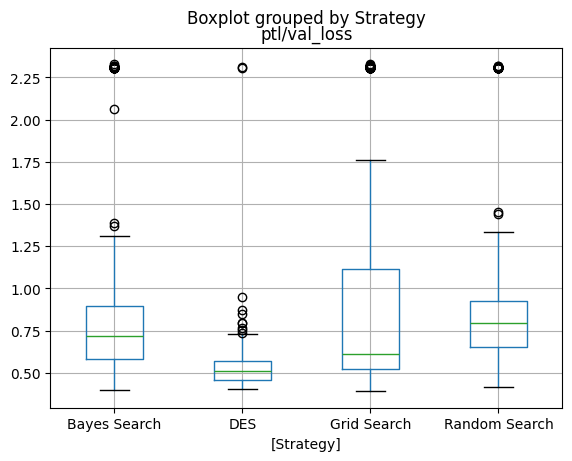

In [13]:
short_cnct[['ptl/val_loss', 'Strategy']].boxplot(by='Strategy')

In [14]:
df = df.rename(columns={'Unnamed: 0': 'Trial no.'})

In [35]:
def maxout(df):
    for i in range(1, len(df)):
        for col in df.columns:
            df.loc[i, col] = min(df.loc[i, col], df.loc[i - 1, col])
    return df

<Axes: xlabel='Trial no.'>

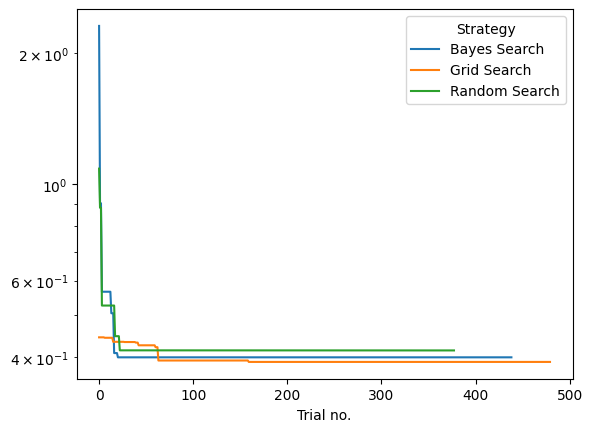

In [32]:
maxout(df[['Trial no.', 'ptl/val_loss', 'Strategy']].pivot(index='Trial no.', columns='Strategy', values='ptl/val_loss'))

In [33]:
maxout_df = df[['Trial no.', 'ptl/val_loss', 'Strategy']].pivot(index='Trial no.', columns='Strategy', values='ptl/val_loss')
## Sorting DES ## maxout_df['DES'] = short_cnct[short_cnct['Strategy'] == 'DES'].sort_values(by = ['population no', 'ptl/val_loss'], ascending=[True, False])['ptl/val_loss'].reset_index(drop=True)
maxout_df['DES'] = df_des['ptl/val_loss'].reset_index(drop=True)

In [18]:
maxout_df.describe()

Strategy,Bayes Search,Grid Search,Random Search,DES
count,439.000000,480.000000,378.000000,224.000000
mean,0.892434,0.966647,0.926734,0.541697
std,0.550994,0.696117,0.495557,0.190519
min,0.399800,0.390188,0.414652,0.405600
25%,0.579810,0.522137,0.651477,0.459295
50%,0.717680,0.609924,0.797395,0.508452
75%,0.895054,1.113324,0.927647,0.569469
max,2.329242,2.327754,2.317770,2.310150


<Axes: ylabel='Density'>

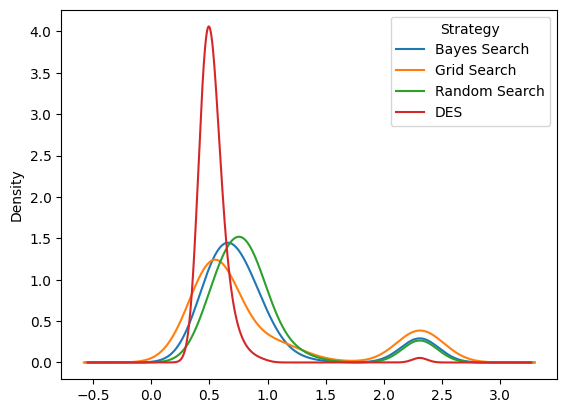

In [19]:
maxout_df.plot.density()

<Axes: xlabel='Trial no.'>

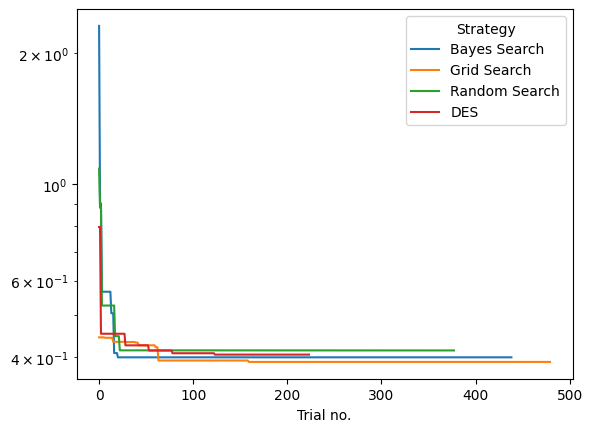

In [36]:
maxout(maxout_df).plot(logy=True)

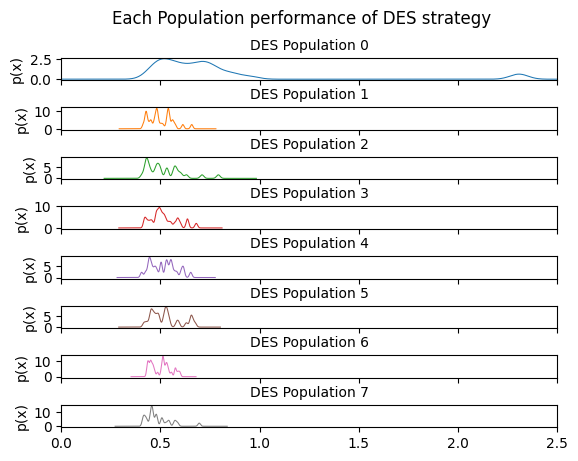

In [20]:
##### Zmienić wysokość populacji 0
axes = df_des[['ptl/val_loss', 'population no']].pivot(columns='population no', values='ptl/val_loss').plot(kind='density', bw_method=0.1, subplots=True, sharey=False, legend=False, linewidth=0.75, title=[f'DES Population {i}' for i in range(0, 8)], xlim=(0, 2.5))
matplotlib.pyplot.subplots_adjust(hspace=1.2)
for i in range(0,8):
    axes[i].set_ylabel('p(x)')
    axes[i].title.set_size(10)
matplotlib.pyplot.suptitle("Each Population performance of DES strategy")
DES_pop_graph = axes.copy()

array([<Axes: title={'center': 'Bayes Search'}, xlabel='Trial no.'>,
       <Axes: title={'center': 'Grid Search'}, xlabel='Trial no.'>,
       <Axes: title={'center': 'Random Search'}, xlabel='Trial no.'>,
       <Axes: title={'center': 'DES'}, xlabel='Trial no.'>], dtype=object)

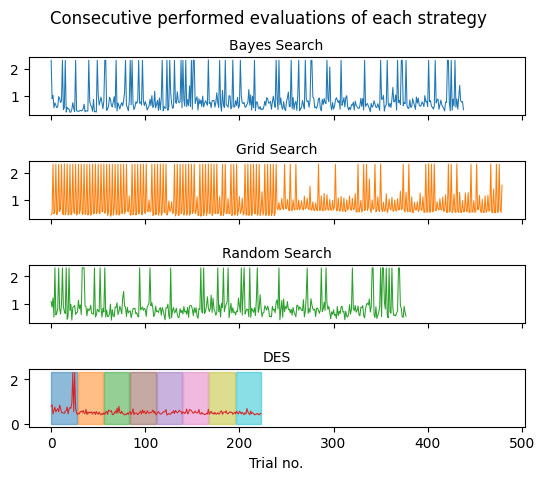

In [21]:
##### Dorzucić nazwy algorytmów
cc = maxout_df.copy()
# for name in ['Bayes Search', 'Grid Search', 'Random Search', 'DES']:
#     cc.loc[2 < cc[name], name] = 1.5
axes = cc.plot(linewidth=0.75, subplots=True, legend=False, title=['Bayes Search', 'Grid Search', 'Random Search', 'DES'])
matplotlib.pyplot.subplots_adjust(hspace=0.8)
matplotlib.pyplot.suptitle("Consecutive performed evaluations of each strategy")
for i in range(4):
    axes[i].title.set_size(10)
for i, c in zip(range(8), ['tab:blue', 'tab:orange', 'tab:green', 'tab:brown', 'tab:purple', 'tab:pink', 'tab:olive', 'tab:cyan']):
    axes[3].fill_between(x=list(range(i*28, (i+1)*28)), y1=0, y2=2.35, color=c, alpha=0.5)
axes

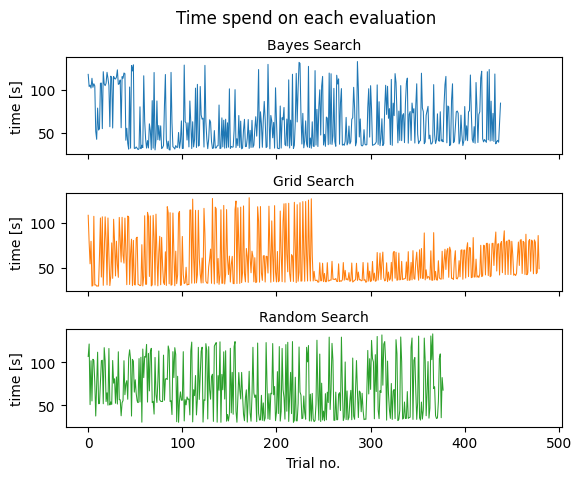

In [22]:
axes = df[['Strategy', 'time_total_s']].reset_index(names=['Trial no.']).pivot(index='Trial no.', columns='Strategy', values='time_total_s').plot(subplots=True, linewidth=0.75, legend=False, title=['Bayes Search', 'Grid Search', 'Random Search'])
matplotlib.pyplot.subplots_adjust(hspace=0.4)
matplotlib.pyplot.suptitle("Time spend on each evaluation")
for i in range(3):
    axes[i].title.set_size(10)
    axes[i].set_ylabel("time [s]")

In [23]:
df[['Strategy', 'time_total_s']].reset_index(names=['Trial no.']).pivot(index='Trial no.', columns='Strategy', values='time_total_s').describe()

Strategy,Bayes Search,Grid Search,Random Search
count,439.000000,480.000000,378.000000
mean,63.102091,57.658036,69.155590
std,30.416469,26.817951,31.594712
min,30.262919,30.046668,30.045414
25%,36.462756,36.414960,39.458651
50%,53.797375,44.946579,62.432359
75%,81.513933,72.173734,101.837712
max,132.851473,127.925724,133.145875


Text(0.5, 0.98, 'Time spend on evaluations')

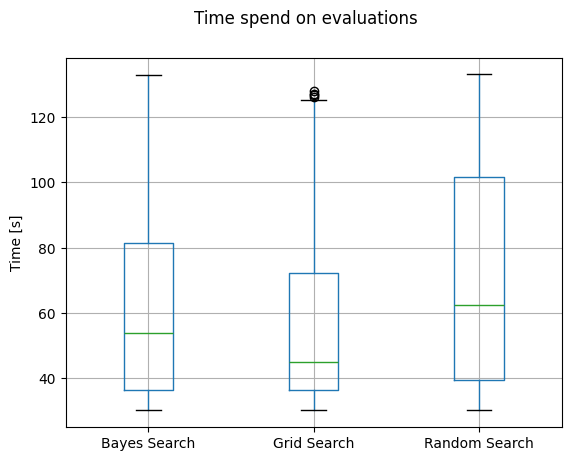

In [28]:
df[['Strategy', 'time_total_s']].reset_index(names=['Trial no.']).pivot(index='Trial no.', columns='Strategy', values='time_total_s').boxplot(ylabel="Time [s]")
matplotlib.pyplot.suptitle('Time spend on evaluations')